<a href="https://colab.research.google.com/github/Meeta49/Saiket-Systems-Machine-Learning-Intern/blob/main/diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("diabetes-1.csv")
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes-1.csv'

first 5 entries

In [ ]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


last 5 entries

In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Info of the dataset

In [ ]:
df.info()

NameError: name 'df' is not defined

Describe the dataset

In [ ]:
df.describe()

In [ ]:
# Count of patients

In [ ]:
print("Diabetes patient",df['Outcome'].value_counts()[1])

NameError: name 'df' is not defined

checking if there is any null val

In [ ]:
null_val=df.isnull();
# null_val1=df.isna();
# print(null_val1)
print(null_val)

mean for all columns

In [ ]:
mean_all_columns=df.mean()
print(mean_all_columns)

removing unnecessary columns

In [ ]:
df.drop('Outcome',axis=1)
# df


Removing rows which have zeros as their value which cannot be
Glucose	BloodPressure	SkinThickness	Insulin * ***italicised text***italicised text* **bold text**

In [ ]:
cols=["Glucose"	,"BloodPressure"	,"SkinThickness"	,"Insulin"]
df[cols] = df[cols].replace(0, np.nan)
df.dropna()

Representation of bmi vs age

In [ ]:
import plotly.express as px
fig = px.scatter(
    df,
    x='Age',
    y='BMI',
    color='Outcome'
)
fig.update_layout(title='Interactive BMI vs Age Scatter Plot')
fig.show()



EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(df['BloodPressure'],df['Insulin'])
plt.xlabel('Insulin')
plt.ylabel('BP')
plt.title('BP vs Insulin')
plt.show()


plt.hist(df['DiabetesPedigreeFunction'],bins=100,color='orange')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('DiabetesPedigreeFunction Histogram')
plt.show()

NameError: name 'df' is not defined

**Heatmap**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Boxplot b/w Glucose level and diabetes outcome

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cols=["Glucose"	,"BloodPressure"	,"SkinThickness"	,"Insulin"]
df[cols] = df[cols].replace(0, np.nan)
df.dropna(inplace=True)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()


Handling outliers with capping



In [ ]:
cols=["Glucose"	,"BloodPressure"	,"SkinThickness"	,"Insulin"]
df[cols] = df[cols].replace(0, np.nan)
df.dropna(inplace=True)
df
df_capped=df.copy()
for col in ['Glucose']:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # median=df_capped[col].median();
  df_capped[col] = df_capped[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
print(df_capped)
print("After capping")
#checking outlier for df capped
sns.boxplot(x='Outcome', y='Glucose', data=df_capped)
plt.title("Glucose Levels by Diabetes Outcome")

plt.show()


Boxplot b/w BP and diabetes outcome

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cols=["Glucose"	,"BloodPressure"	,"SkinThickness"	,"Insulin"]
df[cols] = df[cols].replace(0, np.nan)
df.dropna(inplace=True)
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title("Blood Pressure by Diabetes Outcome")
plt.show()

Handling outlier for the same


In [ ]:
cols=["Glucose"	,"BloodPressure"	,"SkinThickness"	,"Insulin"]
df[cols] = df[cols].replace(0, np.nan)
df.dropna(inplace=True)
df
df_capped=df.copy()
for col in ['BloodPressure','Outcome']:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  median=df_capped[col].median();
  df_capped[col] = df_capped[col].apply(lambda x: median if x > upper_bound else (lower_bound if x < lower_bound else x))
print(df_capped)
print("After capping")
#checking outlier for df capped
sns.boxplot(x='Outcome',y='BloodPressure',data=df_capped)
plt.title("Blood Pressure by Diabetes Outcome")
plt.show()


Boxplot b/w Insulin and Outcomes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cols=["Glucose"	,"BloodPressure"	,"SkinThickness"	,"Insulin"]
df[cols] = df[cols].replace(0, np.nan)
df.dropna(inplace=True)
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title("Insulin by Diabetes Outcome")
plt.show()

Handling outlier for the same

In [ ]:
cols=["Glucose"	,"BloodPressure"	,"SkinThickness"	,"Insulin"]
df[cols] = df[cols].replace(0, np.nan)
df.dropna(inplace=True)
df
df_capped=df.copy()
for col in ['Insulin','Outcome']:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  median=df_capped[col].median();
  df_capped[col] = df_capped[col].apply(lambda x: median if x > upper_bound else (lower_bound if x < lower_bound else x))
print(df_capped)
print("After capping")
#checking outlier for df capped
sns.boxplot(x='Outcome',y='BloodPressure',data=df_capped)
plt.title("Insulin by Diabetes Outcome")
plt.show()


Training the  using supervised learning **bold text**

Accuracy: 74.67532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Logistic precision 0.6379310344827587
Logistic recall 0.6727272727272727
Logistic F1 score 0.6548672566371682


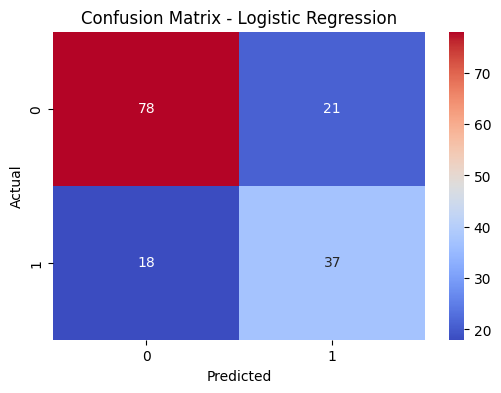

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=80000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100) #for better understanding
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

logistic_precision=precision_score(y_test,y_pred)
print("Logistic precision",logistic_precision)
logistic_recall=recall_score(y_test,y_pred)
print("Logistic recall",logistic_recall)
logistic_f1score=f1_score(y_test,y_pred)
print("Logistic F1 score",logistic_f1score)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


**Training the using unsupervised learning**

Accuracy: 75.32467532467533
Confusion Matrix:
 [[75 24]
 [14 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

Logistic precision 0.6307692307692307
Logistic recall 0.7454545454545455
Logistic F1 score 0.6833333333333333


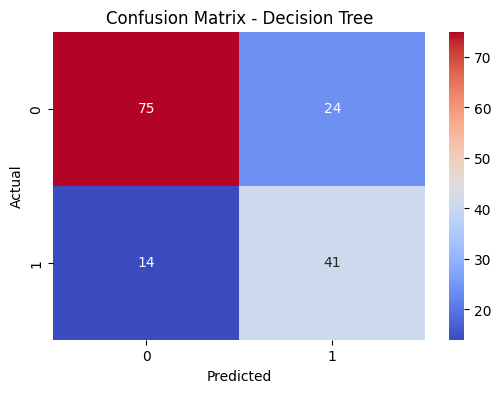

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)  #except outcome all are included
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


decision_precision=precision_score(y_test,y_pred)
print("Decision precision",decision_precision)
decision_recall=recall_score(y_test,y_pred)
print("Decision recall",decision_recall)
decision_f1score=f1_score(y_test,y_pred)
print("decision F1 score",decision_f1score)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Comaprison b/ew logistic regression and decision tree

NameError: name 'file' is not defined

In [ ]:
file.download("saket.xlsx")

NameError: name 'file' is not defined